# IMPORT LIBRARIES

In [1]:
import cv2 # pip install opencv-python

In [2]:
import matplotlib.pyplot as plt # pip install matplotlib

# LOAD MODEL

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

# CLASS

In [5]:
classLabels = [] ##empty list of python
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


# CONFIGURATION

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000026AF0D4EDF0>

# DETECT OBJECT IN IMAGE

In [9]:
img = cv2.imread('mnc.jpg')

In [10]:
ClassIndex, confidece, bbox = model.detect(img,confThreshold=0.5)

In [11]:
print(ClassIndex)

[[1]
 [3]]


In [12]:
font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale, color = (0,255,0),thickness = 2)

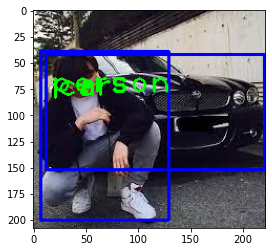

In [13]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# DETECT OBJECT IN VIDEO 

In [ ]:
cap = cv2.VideoCapture("street.mp4")

if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot capture Video")
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidece, bbox = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame, boxes, (255,0,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10,boxes[0]+40) , font, fontScale=font_scale, color=(0,0,255), thickness=2)
    cv2.imshow('Object Detection', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

[[3]
 [8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [8]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [8]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [3]
 [8]]
[[3]
 [8]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [8]]
[[8]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [8]
 [3]
 [3]
 [1]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [8]
 [3]
 [1]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]
 [3]
 [3]]
[[8]
 [3]
 [3]]
[[8]
 [3]
 [3]]
[[8]
 [3]
 

[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [3]
 [3]
 [8]]
[[1]
 [3]
 [3]
 [3]
 [8]]
[[1]
 [3]
 [3]
 [3]]
[[1]
 [3]
 [3]
 [8]
 [4]
 [3]]
[[3]
 [3]
 [1]
 [4]
 [3]
 [8]]
[[3]
 [3]
 [1]
 [8]]
[[1]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [1]
 [4]
 [4]
 [8]
 [3]]
[[3]
 [3]
 [1]
 [3]
 [3]
 [4]]
[[3]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [3]]
[[3]
 [3]
 [8]
 [3]]
[[3]
 [8]
 [3]]
[[8]
 [3]]
[[8]
 [3]
 [3]]
[[3]
 [3]
 [8]]
[[3]
 [3]
 [8]]
[[3]
 [3]
 [8]]
[[8]
 [3]
 [3]]
[[3]
 [3]
 [8]
 [4]]
[[3]
 [3]
 [8]
 [4]]
[[3]
 [3]
 [8]
 [4]]
[[3]
 [8]
 [3]
 [4]]
[[3]
 [8]
 [3]
 [4]]
[[3]
 [8]
 [3]
 [3]
 [4]]
[[3]
 [8]
 [3]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]]
[[3]
 [8]
 [3]]
[[3]
 [8]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [8]
 [3]
 [3]
 [3]
 [3]]
[[3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [3]
 [8]
 [3]]
[[3]
 [3]
 [3]
 [8]
 [3]
 [3]]
[[3]
 [3]
 [3]
 [8]]
[[3]
 [3]
 [8]
 [3]]
